# An Introduction To Exploratory Data Analysis and Hypothesis Testing

## EDA (Exploratory Data Analysis)

Understanding the shape of the distribution of your data is an imperative to informing hypotheses about your data.  By understanding the various 1 dimensional projections (aka columns) of your dataset, you'll be able to understand what statistical questions to ask which inform your early analysis.

The true beginning of any data science project _should_ be a conversation, however it's hard to get what you need without anything to show.  Exploratory data analysis is often the trojan horse to learn more of the domain expertise of your data as well as to get to know the client.

They see that you've done "something" and you get the opportunity to ask important questions like:

* does this sample or this data make sense given what stakeholder expects? 
* do the various columns mean what you think (based on the column names)?

By doing the exploratory data analysis, you can usually get answers to these questions.


## Techniques

* shape parameters of your distribution
    * measures of centrality
    * measures of spread
    * multiple centriods
* visualizing your dataset
    * histogram plotting
    * scatter plotting
* distributions
    * moment generating functions
        * a generalization of centrality
        * a generalization of spread
    * visualizing the normal distribution
    * visualizing the exponential distribution
    * visualizing the beta distribution
    * Discerning the shape of a distribution in specific
        * MLE
        * MAP


## Hypothesis Testing

* understanding the null and alternative hypothesis
* pvalues and their interpretation
* the statistic of a hypothesis test
* the power of a statistical test
* Example hypothesis tests
    * normality tests
        * Shapiro-Wilk Test
        * D’Agostino’s K^2 Test
        * Anderson-Darling Test
    * Correlation Tests
        * Pearson’s Correlation Coefficient
        * Spearman’s Rank Correlation
        * Kendall’s Rank Correlation
        * Chi-Squared Test
    * Parametric Statistical Hypothesis Tests
        * Student’s t-test
        * Paired Student’s t-test
        * Analysis of Variance Test (ANOVA)
        * Repeated Measures ANOVA Test
    * Nonparametric Statistical Hypothesis Tests
        * Mann-Whitney U Test
        * Wilcoxon Signed-Rank Test
        * Kruskal-Wallis H Test
        * Friedman Test
        
        
* a scheme for finding the distribution of your data (Optionally)
    * MLE
    * Sampling in Python when you need to consider multiple columns
    * Analyzing the results of your hypotheses

# References:

[Statistical Tests Cheatsheet](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

[NIST handbook](https://www.itl.nist.gov/div898/handbook/)


## Shape Parameters

In order to get some information about our distribution of data, we usually start with figuring out the center of our dataset.  The central tendency of our dataset has a relationship to the "expected value" of the data.  If our data is representative of the underlying population, then the central tendency is a good approxmation of what we can expect of our data over many repeated experiments from our data.

In [5]:
import numpy as np

arr = np.random.normal(0, 10, size=10)
arr.mean()

-2.6168993195216026

The above gives us the average of ten repeated sample data points.  If we want the expected value we need to see how the average converges over many repeated samples from the distribution.

In [9]:
arr = np.random.normal(0, 10, size=100000000)
arr.mean()

0.0016411209873510087

Notice that we use the same method to determined the expected value as we use to determine the average.  Unfortunately, the average only works with normally distributed data.  We'll need a broader notion of centrality to capture the expected value of any random variable.

In order to get more information about our distribution we'll ask about how spread out the data is.  This gives us a sense of the scale of the distribution of the data.  The scale or spread of the data can tell us how to compare a given data point against the entire distribution and how typical a given point is.  If a point is far away from the central tendency or expectation then it is likely atypical for the distribution.  If a point is nearby the center, it is likely much more expected.

In [36]:
arr = np.random.normal(0, 10, size=100000)
arr.std()

9.989376571859928

As we can see standard deviation or spread for this random variable is around 10.  What does this mean?  Well we can start to ask questions of our data, like - how likely is it that we get a data point of 10000, given that our data is normally distributed with a mean of 0 and standard deviation of 10 and 100000 data points?

We can start by answering the question visually.

(array([0.0010682, 0.       , 0.       , ..., 0.       , 0.       ,
        0.0010682]),
 array([-51.2438227 , -51.23446116, -51.22509962, ...,  42.35286433,
         42.36222587,  42.37158741]),
 <a list of 10000 Patch objects>)

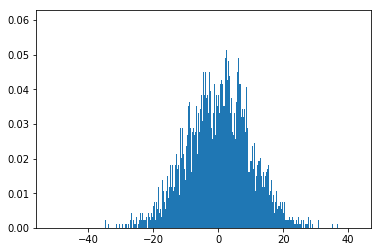

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(arr, bins=10000, density=True)

Given the scale of the distribution - which we can see on the x-axis, clearly the data point of 10000 is well outside what we'd expect for a data point, given this distribution of data.  

## Dealing with data that isn't normally distributed

What happens when our data isn't perfectly normally distributed?  Here's an example dataset that isn't exactly normally distributed:

In [127]:
from scipy.stats import skewnorm

skew_magnitude = 4
arr = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

To generate the above dataset we use a skew normal random variable, one that allows us to pass the third moment of the normal distribution directly.  Because the skew is positive, the tail of our distribution will be on the right.

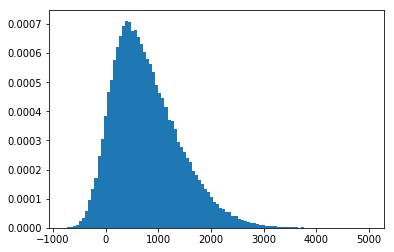

In [128]:
plt.hist(arr, bins=100, density=True)
plt.show()

How might we get a measure of center for a dataset that isn't perfectly normal?  The simple average might give us an approximating of the center:

In [129]:
arr.mean()

775.0773690359506

Let's compare this with what the median produces:

In [130]:
import statistics as st

st.median(arr)

673.6524771212421

In [131]:
skew_magnitude = -4
arr2 = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

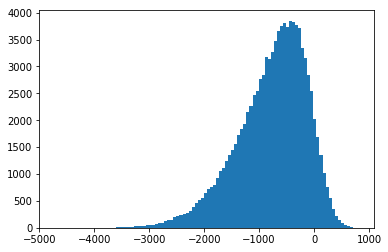

In [132]:
plt.hist(arr2, bins=100, density=False)
plt.show()

In [133]:
arr2.mean()

-771.9201454772459

In [134]:
st.median(arr2)

-672.9753868254722

As you can see here, the mean overstates the central tendency of the dataset by quite a bit!  So this tells us when our assumptions are violated we will need to make use of descriptive statistics which are robust to our assumptions needing to be relaxed

The major reason that the arithemtic mean overstates the average in this case is because of how it treats large values.  Recall the formula for the arithmetic mean:

$$ 1/N \sum_{i=0}^{i=N} X[i] $$

Where X is a list of numbers.

Because the sum treats all values equally, if you have one large number the average can shift by a lot.  

The way that robust descriptive statistics like the median get around this is by looking at the rank of the data.  How this works:

First the data is sorted into ascending order and then different sorted elements are used as alternative measures for centrality and spread.  While not perfectly robust, they do well with a lot of different distributions that are approximately normal but exhibiting some non-normal tendencies either by a non zero skew or a non zero kurtosis.

In [142]:
def interquartile_range(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    return q3 - q1

print("Median", np.percentile(arr, 50))
print("Interquartile Range", interquartile_range(arr))
print("Mean", arr.mean())
print("Standard Deviation", arr.std())

Median 673.6524771212421
Interquartile Range 840.351319347348
Mean 775.0773690359506
Standard Deviation 633.2153887790821


As you can see, the above robust statistics capture the same information - the center and the spread of the distribution, except because these are rank order statistics, they won't capture any information from the outliers.  This is because they only look at sorted order, these statistics are unaware of bias via outliers.

Another important robust descriptive statistic is the [trimean](https://en.wikipedia.org/wiki/Trimean).

In [144]:
def trimean(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    median = np.percentile(arr, 50)
    return (q1 + 2*median + q3)/4

print("Trimean", trimean(arr))

Trimean 701.7110944368526


"An advantage of the trimean as a measure of the center (of a distribution) is that it combines the median's emphasis on center values with the midhinge's attention to the extremes."

— Herbert F. Weisberg, Central Tendency and Variability

Before we leave our discussion of central tendency, it is possible that our data will not comfortably conform to one central tendency, it may be the case that multiple central tendencies are present, for this we will introduce the k means algorithm

In [168]:
from sklearn.cluster import KMeans

arr1 = np.random.normal(100, 50, size=10000)
arr2 = np.random.normal(800, 50, size=10000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[ 99.82624339],
       [799.60974984]])

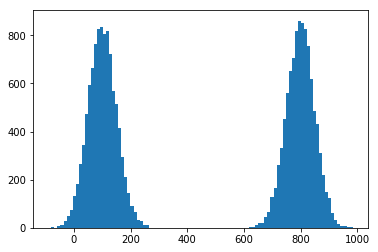

In [169]:
plt.hist(multi_center_dist, bins=100)
plt.show()

In [176]:
from sklearn.cluster import KMeans

arr1 = skewnorm.rvs(-2, loc=200, scale=50, size=1000)
arr2 = skewnorm.rvs(2, loc=800, scale=50, size=1000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[163.9252768 ],
       [835.22386134]])

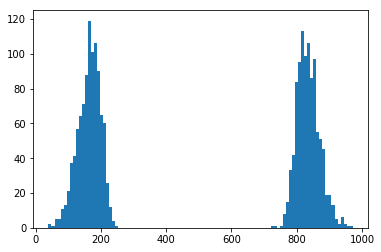

In [177]:
plt.hist(multi_center_dist, bins=100)
plt.show()

As you can see, the K-Means algorithm captures both of the centers of our distribution.  Additionally, KMeans can generalize to $R^{n}$ space, meaning we can capture a sense of a higher dimensional centrality directly, rather than looking at the marginal centrality of different aspects of our dataset. 

## Dealing with 2 Dimensional Data

Thus far we've dealt primarily with 1 dimensional data, so the histogram was simply the right choice.  What happens when we go multi-dimensional?

For this we will need a number of techniques, however the simplest ones involve just visualizing the data.  For this we will need some new visualizations.  In this case we will turn to scatter plots first:

In [182]:
from sklearn import datasets

boston = datasets.load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [199]:
import pandas as pd

columns = ["CRIM", "ZN", "INDUS", 
          "CHAS", "NOX", "RM", 
          "AGE", "DIS", "RAD", 
          "TAX", "PTRATIO", "B", 
          "LSTAT"]
df = pd.DataFrame(data=boston.data[:,:], columns=columns) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


StandardScaler(copy=True, with_mean=True, with_std=True)

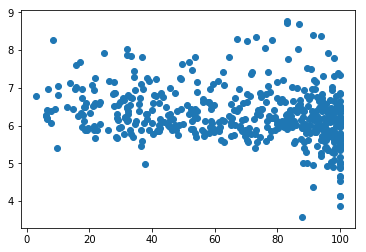

In [212]:
X = df["AGE"].values
Y = df["RM"].values

plt.scatter(X, Y)

From the above data we can actually see something interesting!  As the proportion of houses built before 1940 increases, the number of rooms spreads out significantly.  This means we can say, older houses likely had more rooms possibly because family size was larger and more varied.  As a result when family size stablized around 2 children per household, the number of rooms may have stablized as well.  Also, there is likely a poverty effect here, as American workers made more money, it probably meant fewer homes with a small number of rooms.

Of course, the above is all just guess work, but there is certainly a pattern we can discern from the above picture - the number of rooms in older homes is more varied than newer homes.

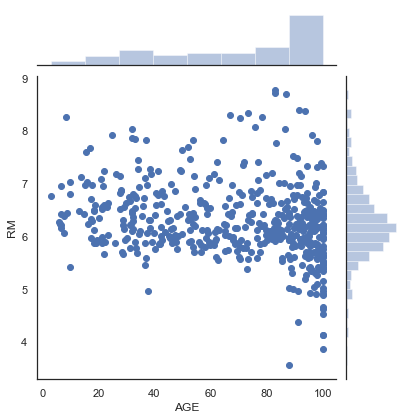

In [216]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.jointplot(x="AGE", y="RM", data=df)
plt.show()

Interestingly, we get a very different picture by looking at the joint plot.  It appears as though most of the homes total that are being shown are in the 90-100% range of being built before 1940.  What this suggests is that the housing stock simply degrades slowly and that there are far fewer new houses than old, which is why the spread of room is so much higher if we account for areas with mostly older homes.

We can easily add a regression line which looks at the distribution of marginal densities:

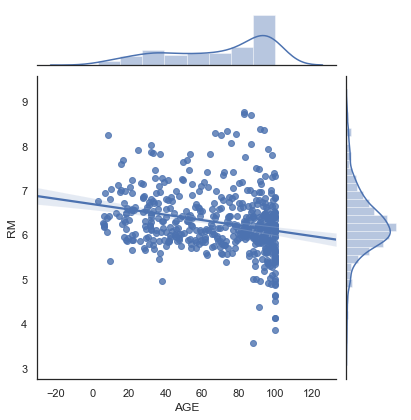

In [217]:
sns.jointplot(x="AGE", y="RM", data=df, kind="reg")
plt.show()

Notice that this visual "model" of our data merely shows us how the data is distributed and where the majority of the data is.  By fitting a line through the data, we can see the slight negative relationship between AGE and number of rooms clearly spelled out.  

Of course, we aren't talking in detail about linear regression here.  So this is merely to show the power of good visualization.

## Finding The Central Tendency and Spread In General

Thus far we have looked at mostly normally distributed data.  Finding the center and spread of the data was relatively straight forward, however that isn't always the case.

The reason it was easy to find the center and spread is because we made an assumption about the shape of the underlying data, namely that it was _normally_ distributed.  What happens if we need to relax that assumption?  How can we talk about centrality and spread in the general setting of any distribution of data.

For this we'll need a more general notion of centrality and spread.  One way to attack this is to assume some underlying function that approximately generates your data and then to come up with another function which acts on this distribution generating function to recover the shape parameters of the distribution.  The first two of these shape parameters are the central tendency and the spread for the distribution.  

The name given to the function that acts on a distribution to recover its shape parameters is called the moment generating function.  For smooth, continuous distribution functions, the moment generating function can generate many moments, by differentiating the distribution function.

While the moment generating function does not exist for all distributions, it exists for many, allowing us to extend our discussion of descriptive statistics to many cases, while abstracting away the details of _how_ we calcuate measures of centrality and spread to, _how_ do we interpret our distribution based on it's shape parameters?

The technical aspects of how to derive said moment generating functions are likely unimportant.  What is interest, is a few of the collaries:

* no two distributions of data calculate the central tendency or spread the same way
* there are potentially many shape parameters associated with each distribution of data that give us tons of information about the data.

## Looking at some specific examples

* Normal Distribution
    * Central tendency: 
    
    $$ 1/n \sum_{i=0}^{i=n} x_{i} $$ 
    
    * Spread: 
    
    $$ 1/n \sum_{i=0}^{i=n}(x_{i} - \mu)^{2} $$
    
* Exponential Distribution

    * Central tendency:
        
       $$ \lambda^{-1} $$
    
    * Spread:
    
       $$ \lambda^{-2} $$
       
* Beta Distribution

    * Central tendency:
    
       $$ \dfrac{\alpha}{\alpha + \beta} $$
    
    * Spread: 

       $$ \dfrac{\alpha\beta}{(\alpha + \beta)^{2}(\alpha + \beta + 1)} $$

What do each of these formulas have in common for each calculation of center and spread?  The answer: Nothing!  They couldn't be more different.  And because of that, we know with some level of certainty that it is an imperative we know what data distribution we are dealing with, if we want to say anything meaningful about our data.

So how do we account for this in our modeling?  By verifying the distribution that our data comes from.  We'll see how to do this a little later on, but for now let's assume that we simply know by visual inspection what our data looks like.  In order to do this, let's look at pictures of the three distributions listed above:

In [344]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(0.5, size=10000)
beta_dist = np.random.beta(1, 3.25, size=10000)

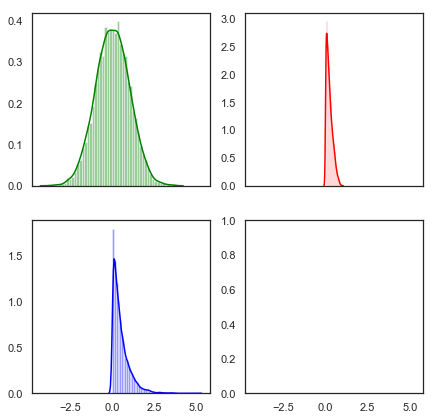

In [345]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( normal_dist , color="green", ax=axes[0, 0])
sns.distplot( exponential_dist , color="blue", ax=axes[1, 0])
sns.distplot( beta_dist , color="red", ax=axes[0, 1])

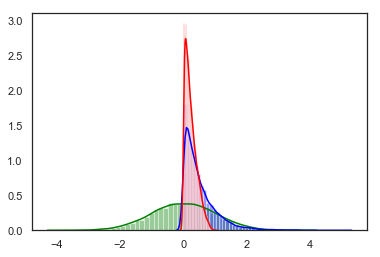

In [346]:
sns.distplot( normal_dist , color="green")
sns.distplot( exponential_dist , color="blue")
sns.distplot( beta_dist , color="red")

plt.show()

Note the distinctive shapes for each distribution - 

The normal distribution, shown in green, is fairly spreadout and data is evenly distributed with a bulge at the center.

The beta distribution, shown in red has the highest peak and the smallest spread.  This makes beta distributions ideal for bayesian inference, because the majority of the data falls in a small area.  It's important to note, as the shape parameters for the distribution change, the beta distribution can actually take on a lot of different shapes.

Finally, in blue, the exponential distribution falls inbetween the shape of the beta and normal distribution, some of it's data hovers in one area, but then the other half has a long tail, which more closely resembles the density of the normal distribution in spread.

In fact, as the exponential distribution heads towards a shape parameter of 2, it closes resembles at standard normal variable (with mean 0 and variance 1):

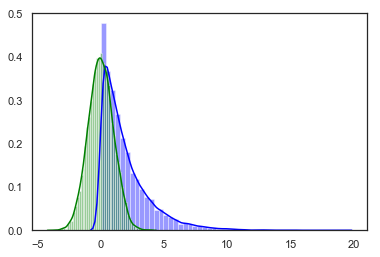

In [385]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(1.9, size=10000)
sns.distplot( exponential_dist , color="blue")
sns.distplot( normal_dist , color="green")

plt.show()

Before we leave the topic of distributions, let's discuss a powerful techniques for finding the shape parameters of sample data that we believe belongs to the population distribution (spoiler: it also has many other use cases).

For example assume that we only have a sample of 100 students, that we believe are normally distributed and we would like to figure out the shape parameters for the population.  We can use a technique called maximum likelihood estimation to discern these parameters.  MLE is used for a variety of different learning tasks, including ordinary least squares amongst others.  For now, we will concern ourselves with just using it to fit the shape parameters of a population distribution given a sample:

In [394]:
students_tests = np.random.normal(70, 15, size=110)
students_tests = students_tests[students_tests < 100]
students_tests = students_tests[np.random.randint(0, 100, size=100)]

In [401]:
from scipy import stats

stats.norm.fit(students_tests)

As you can see, we recover the most likely population shape parameters from the sample of 100 students.  

In [399]:
from scipy import stats
import numpy as np


def distribution_analysis(data, distributions):
    results = {}
    results["normal_test"] = stats.normaltest(data)
    for name, distribution in distributions:
        # MLE approximation for shape parameters 
        
        shape_parameters = distribution.fit(data)
        shape_parameters = list(shape_parameters)
        if name == 'erlang':
            shape_parameters[0] = int(shape_parameters[0])
            shape_parameters[1] = int(shape_parameters[1])
        if name == 'gausshyper':
            simulation = distribution.rvs(
                shape_parameters[0],
                shape_parameters[1],
                shape_parameters[2],
                shape_parameters[3],
                size=len(data))
        else:
            simulation = distribution.rvs(shape_parameters[0], shape_parameters[1], size=len(data))

        # statistical tests for distribution similarity
        results[name+"_pearson"] = stats.pearsonr(data, simulation)
        results[name+"_spearman"] = stats.spearmanr(data, simulation)
        results[name+"_mannwhitneyU"] = stats.mannwhitneyu(data, simulation, alternative="two-sided")
        results[name+"_wilcoxon"] = stats.wilcoxon(data, simulation)
        results[name+"_ks_2sample"] = stats.ks_2samp(data, simulation)
    return results

distributions = [
      ('beta', stats.beta),
      ('cauchy', stats.cauchy),
      ('chi', stats.chi),
      ('chi2', stats.chi2),
      ('dweibull', stats.dweibull),
      ('erlang', stats.erlang),
      ('expon', stats.expon),
      ('fisk', stats.fisk),
      ('foldcauchy', stats.foldcauchy),
      ('foldnorm', stats.foldnorm),
      ('gamma', stats.gamma),
      ('gausshyper', stats.gausshyper),
      ('invgauss', stats.invgauss),
      ('levy', stats.levy),
      ('maxwell', stats.maxwell),
  ]

In [400]:
[elem for elem in dir(stats) if elem.lower().startswith("n")]

['nakagami',
 'nbinom',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'normaltest',
 'norminvgauss']